In [88]:
import pandas as pd

def extract_data_pandas(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    start_marker = 'Stimuli Results,,,,,'  # Ensure it matches exactly
    end_marker = ',,,,,'

    # Find the start and end indices
    try:
        start_idx = lines.index(start_marker + '\n') + 1  # Data starts after the start_marker
    except ValueError:
        print("Start marker not found.")
        return None

    try:
        end_idx = lines.index(end_marker + '\n', start_idx)
    except ValueError:
        print("End marker not found.")
        return None

    # Extract relevant lines
    relevant_lines = lines[start_idx:end_idx]

    # Write the relevant lines to a temporary CSV
    temp_csv = 'extracted_data.csv'
    with open(temp_csv, 'w', encoding='utf-8') as temp_file:
        temp_file.writelines(relevant_lines)

    # Read the extracted data using pandas
    df = pd.read_csv(temp_csv)
    
    return df

# Usage
csv_file_path = 'Super-Resolution-Color-Imaging-results.csv'  # Replace with your actual file path
data_df = extract_data_pandas(csv_file_path)

if data_df is not None:
    print("Extracted Data:")
    print(data_df.head())  # Display first few rows
    # Proceed with your next tasks here


Extracted Data:
   observer id  session id           left image        right image  \
0         2644        6951    0809_ResShift.png    0809_BSRGAN.png   
1         2644        6951      0809_BSRGAN.png    0809_SwinIR.png   
2         2644        6951  0809_RealESRGAN.png  0809_ResShift.png   
3         2644        6951  0809_RealESRGAN.png    0809_SwinIR.png   
4         2644        6951      0809_SwinIR.png  0809_ResShift.png   

      selected image  time spent (in seconds)  
0  0809_ResShift.png                        4  
1    0809_SwinIR.png                        5  
2  0809_ResShift.png                        6  
3    0809_SwinIR.png                        9  
4  0809_ResShift.png                        7  


In [89]:
data_df

,observer id,session id,left image,right image,selected image,time spent (in seconds)
0,2644,6951,0809_ResShift.png,0809_BSRGAN.png,0809_ResShift.png,4
1,2644,6951,0809_BSRGAN.png,0809_SwinIR.png,0809_SwinIR.png,5
2,2644,6951,0809_RealESRGAN.png,0809_ResShift.png,0809_ResShift.png,6
3,2644,6951,0809_RealESRGAN.png,0809_SwinIR.png,0809_SwinIR.png,9
4,2644,6951,0809_SwinIR.png,0809_ResShift.png,0809_ResShift.png,7
...,...,...,...,...,...,...
895,2642,6987,0814_RealESRGAN.png,0814_ResShift.png,0814_RealESRGAN.png,7
896,2642,6987,0814_BSRGAN.png,0814_ResShift.png,0814_ResShift.png,6
897,2642,6987,0814_BSRGAN.png,0814_SwinIR.png,0814_SwinIR.png,4
898,2642,6987,0814_SwinIR.png,0814_ResShift.png,0814_ResShift.png,4


In [90]:
# Replace 'ObserverID' with the actual column name that identifies observers
observer_column = 'session id'  # Update this if your column name is different

unique_observers = data_df[observer_column].nunique()
print(f"Number of Unique Observers: {unique_observers}")

if unique_observers == 15:
    print("✅ Correct number of observers.")
else:
    print(f"❌ Expected 15 observers, but found {unique_observers}.")


Number of Unique Observers: 15
✅ Correct number of observers.


In [91]:
# Replace 'ObserverID' with the actual column name
comparisons_per_observer = data_df.groupby(observer_column).size()

# Display the number of comparisons per observer
print("\nNumber of Comparisons per Observer:")
display(comparisons_per_observer)

# Check if all observers have exactly 60 comparisons
incorrect_counts = comparisons_per_observer[comparisons_per_observer != 60]

if incorrect_counts.empty:
    print("\n✅ All observers have exactly 60 comparisons.")
else:
    print("\n❌ The following observers do not have 60 comparisons:")
    display(incorrect_counts)



Number of Comparisons per Observer:


session id
6951    60
6956    60
6958    60
6959    60
6961    60
6978    60
6979    60
6980    60
6981    60
6982    60
6983    60
6984    60
6985    60
6986    60
6987    60
dtype: int64


✅ All observers have exactly 60 comparisons.


In [92]:
total_comparisons = len(data_df)
expected_total = 15 * 60

print(f"Total Number of Comparisons: {total_comparisons}")
print(f"Expected Number of Comparisons: {expected_total}")

if total_comparisons == expected_total:
    print("✅ Correct total number of comparisons.")
else:
    print(f"❌ Expected {expected_total} comparisons, but found {total_comparisons}.")


Total Number of Comparisons: 900
Expected Number of Comparisons: 900
✅ Correct total number of comparisons.


Okay the data confirmed!!

Time to Analyse

In [93]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Load the extracted data
# Replace 'extracted_data.csv' with your actual file path if different
data_df = pd.read_csv('extracted_data.csv')

# Display the first few rows
display(data_df.head())


,observer id,session id,left image,right image,selected image,time spent (in seconds)
0,2644,6951,0809_ResShift.png,0809_BSRGAN.png,0809_ResShift.png,4
1,2644,6951,0809_BSRGAN.png,0809_SwinIR.png,0809_SwinIR.png,5
2,2644,6951,0809_RealESRGAN.png,0809_ResShift.png,0809_ResShift.png,6
3,2644,6951,0809_RealESRGAN.png,0809_SwinIR.png,0809_SwinIR.png,9
4,2644,6951,0809_SwinIR.png,0809_ResShift.png,0809_ResShift.png,7


In [94]:
# Rename columns for clarity
data_df.rename(columns={
    'observer id': 'ObserverID',
    'session id': 'SessionID',
    'left image': 'LeftImage',
    'right image': 'RightImage',
    'selected image': 'SelectedImage',
    'time spent (in seconds)': 'TimeSpent'
}, inplace=True)

# Create a mapping from original SessionIDs to 1-15
unique_sessions = sorted(data_df['SessionID'].unique())
session_mapping = {original: new for new, original in enumerate(unique_sessions, start=1)}

# Apply the mapping to renumber SessionIDs
data_df['SessionID'] = data_df['SessionID'].map(session_mapping)

# Verify the renumbered SessionIDs
print("Updated SessionIDs:")
print(data_df['SessionID'].unique())


Updated SessionIDs:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [95]:
# Define a function to extract model names from image filenames
def extract_model(image_filename):
    if 'ResShift' in image_filename:
        return 'ResShift'
    elif 'SwinIR' in image_filename:
        return 'SwinIR'
    elif 'RealESRGAN' in image_filename:
        return 'RealESRGAN'
    elif 'BSRGAN' in image_filename:
        return 'BSRGAN'
    else:
        return 'Unknown'

# Apply the function to create model columns
data_df['LeftModel'] = data_df['LeftImage'].apply(extract_model)
data_df['RightModel'] = data_df['RightImage'].apply(extract_model)
data_df['SelectedModel'] = data_df['SelectedImage'].apply(extract_model)

# Verify the mapping
display(data_df.head())


,ObserverID,SessionID,LeftImage,RightImage,SelectedImage,TimeSpent,LeftModel,RightModel,SelectedModel
0,2644,1,0809_ResShift.png,0809_BSRGAN.png,0809_ResShift.png,4,ResShift,BSRGAN,ResShift
1,2644,1,0809_BSRGAN.png,0809_SwinIR.png,0809_SwinIR.png,5,BSRGAN,SwinIR,SwinIR
2,2644,1,0809_RealESRGAN.png,0809_ResShift.png,0809_ResShift.png,6,RealESRGAN,ResShift,ResShift
3,2644,1,0809_RealESRGAN.png,0809_SwinIR.png,0809_SwinIR.png,9,RealESRGAN,SwinIR,SwinIR
4,2644,1,0809_SwinIR.png,0809_ResShift.png,0809_ResShift.png,7,SwinIR,ResShift,ResShift


In [96]:
# Check for any 'Unknown' models
unknown_models = data_df[data_df['SelectedModel'] == 'Unknown']
print(f"Number of 'Unknown' models: {len(unknown_models)}")

# If any, display them for inspection
if len(unknown_models) > 0:
    display(unknown_models)
    # Implement necessary corrections here


Number of 'Unknown' models: 0


Number of Trials per Observer:


SessionID
1     60
2     60
3     60
4     60
5     60
6     60
7     60
8     60
9     60
10    60
11    60
12    60
13    60
14    60
15    60
Name: count, dtype: int64

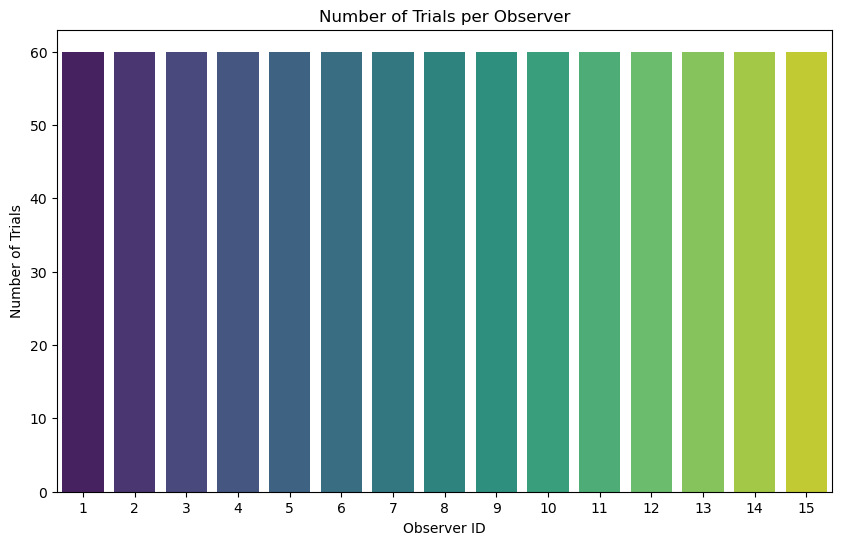

In [97]:
# Count number of trials per observer
trials_per_observer = data_df['SessionID'].value_counts().sort_index()
print("Number of Trials per Observer:")
display(trials_per_observer)

# Visualize the distribution
plt.figure(figsize=(10,6))
sns.barplot(x=trials_per_observer.index, y=trials_per_observer.values, palette='viridis')
plt.title('Number of Trials per Observer')
plt.xlabel('Observer ID')
plt.ylabel('Number of Trials')
plt.show()


In [98]:
# Count the number of unique sessions
num_sessions = data_df['SessionID'].nunique()
print(f"Number of distinct sessions: {num_sessions}")

# (Optional) List all unique SessionIDs
unique_sessions = data_df['SessionID'].unique()
print("Unique SessionIDs:")
print(unique_sessions)


Number of distinct sessions: 15
Unique SessionIDs:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Model Selections:


SelectedModel
BSRGAN        143
RealESRGAN    228
ResShift      309
SwinIR        220
Name: count, dtype: int64

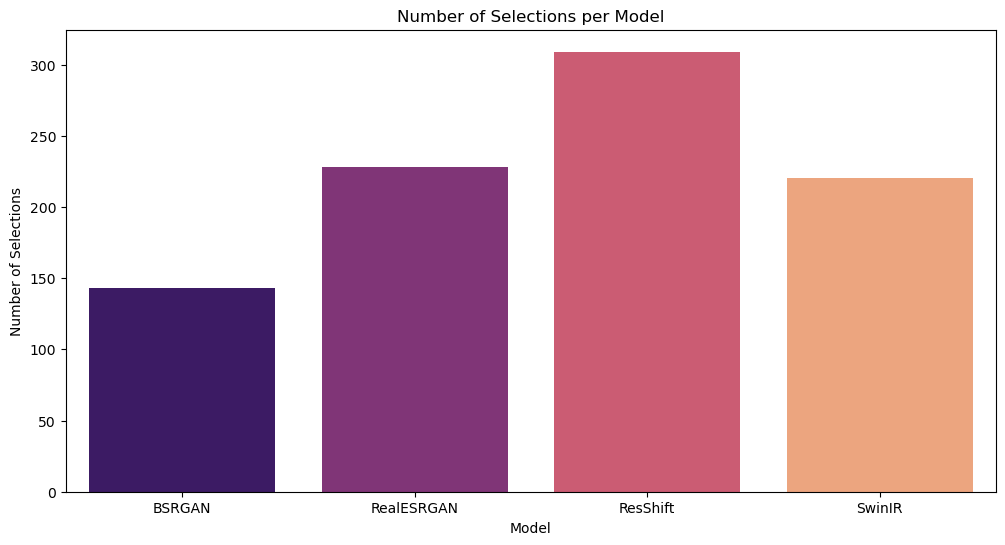

In [99]:
# Count selections per model
model_selections = data_df['SelectedModel'].value_counts().sort_index()
print("Model Selections:")
display(model_selections)

# Visualize selections
plt.figure(figsize=(12,6))
sns.barplot(x=model_selections.index, y=model_selections.values, palette='magma')
plt.title('Number of Selections per Model')
plt.xlabel('Model')
plt.ylabel('Number of Selections')
plt.show()


Time Spent (in seconds) Statistics:


count    900.000000
mean       6.506667
std        7.674913
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: TimeSpent, dtype: float64

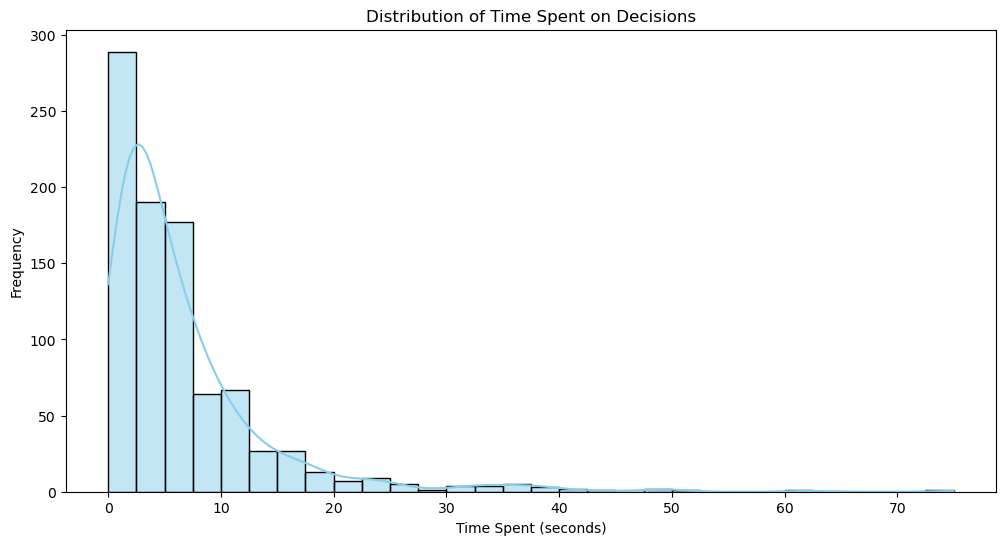

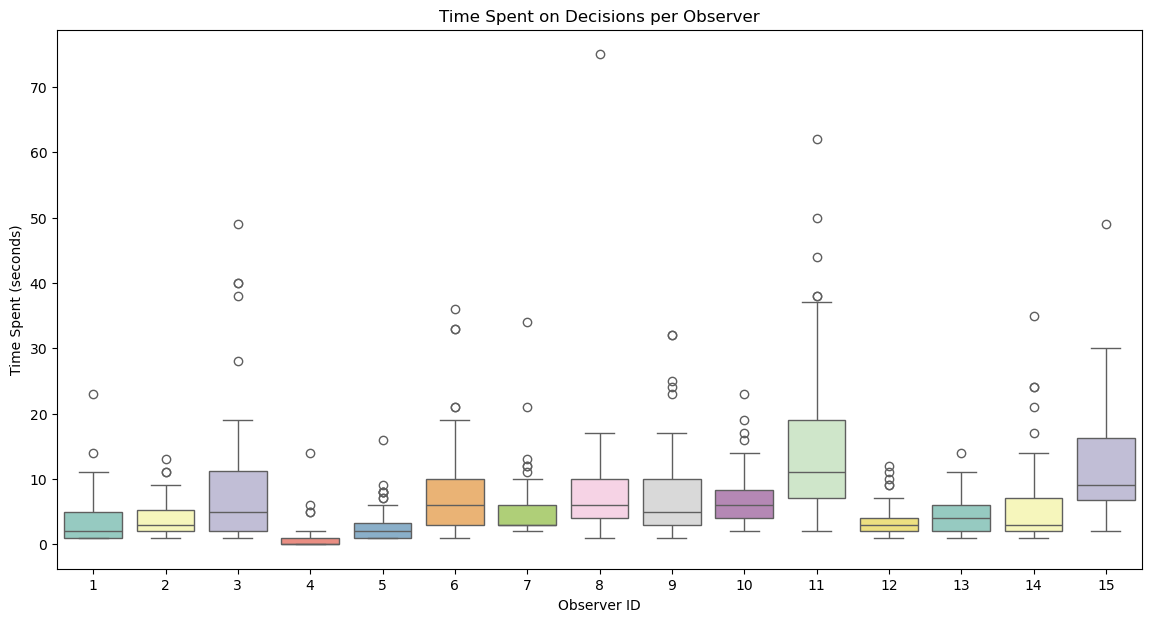

In [100]:
# Summary statistics
print("Time Spent (in seconds) Statistics:")
display(data_df['TimeSpent'].describe())

# Visualize decision times
plt.figure(figsize=(12,6))
sns.histplot(data_df['TimeSpent'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Time Spent on Decisions')
plt.xlabel('Time Spent (seconds)')
plt.ylabel('Frequency')
plt.show()

# Boxplot per observer
plt.figure(figsize=(14,7))
sns.boxplot(x='SessionID', y='TimeSpent', data=data_df, palette='Set3')
plt.title('Time Spent on Decisions per Observer')
plt.xlabel('Observer ID')
plt.ylabel('Time Spent (seconds)')
plt.show()


In [101]:
# Initialize preference matrix
models = ['ResShift', 'SwinIR', 'RealESRGAN', 'BSRGAN']
preference_matrix = pd.DataFrame(0, index=models, columns=models)

# Populate the matrix
for index, row in data_df.iterrows():
    chosen = row['SelectedModel']
    # Determine the loser model
    loser = row['RightModel'] if chosen == row['LeftModel'] else row['LeftModel']
    # Increment the count for chosen over loser
    preference_matrix.at[chosen, loser] += 1

print("Preference Matrix:")
display(preference_matrix)


Preference Matrix:


,ResShift,SwinIR,RealESRGAN,BSRGAN
ResShift,0,103,95,111
SwinIR,47,0,76,97
RealESRGAN,55,74,0,99
BSRGAN,39,53,51,0


Win Ratios:


ResShift      0.686667
RealESRGAN    0.506667
SwinIR        0.488889
BSRGAN        0.317778
dtype: float64

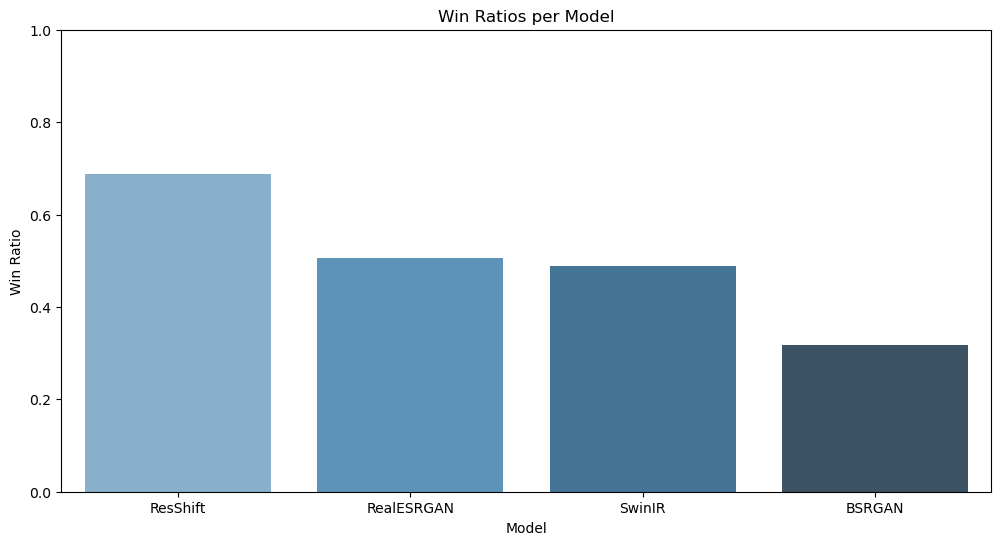

In [102]:
# Calculate wins per model
wins = preference_matrix.sum(axis=1)

# Calculate total comparisons per model
total_comparisons = preference_matrix.sum(axis=1) + preference_matrix.sum(axis=0) - preference_matrix.values.diagonal()

# Compute win ratios
win_ratios = wins / total_comparisons
win_ratios = win_ratios.fillna(0)  # Handle division by zero

# Display win ratios
win_ratios = win_ratios.sort_values(ascending=False)
print("Win Ratios:")
display(win_ratios)

# Visualize win ratios
plt.figure(figsize=(12,6))
sns.barplot(x=win_ratios.index, y=win_ratios.values, palette='Blues_d')
plt.title('Win Ratios per Model')
plt.xlabel('Model')
plt.ylabel('Win Ratio')
plt.ylim(0,1)
plt.show()


In [103]:
# Create a DataFrame for pairwise comparisons between models
bt_data = preference_matrix.stack().reset_index()
bt_data.columns = ['Winner', 'Loser', 'Wins']

# Remove self-comparisons if any
bt_data = bt_data[bt_data['Winner'] != bt_data['Loser']]

# Display the pairwise data
display(bt_data)


,Winner,Loser,Wins
1,ResShift,SwinIR,103
2,ResShift,RealESRGAN,95
3,ResShift,BSRGAN,111
4,SwinIR,ResShift,47
6,SwinIR,RealESRGAN,76
7,SwinIR,BSRGAN,97
8,RealESRGAN,ResShift,55
9,RealESRGAN,SwinIR,74
11,RealESRGAN,BSRGAN,99
12,BSRGAN,ResShift,39


In [104]:
# Initialize LabelEncoder for models
le = LabelEncoder()
le.fit(models)

# Encode models
bt_data['Winner_encoded'] = le.transform(bt_data['Winner'])
bt_data['Loser_encoded'] = le.transform(bt_data['Loser'])

# Define the number of comparisons
bt_data['Pairs'] = bt_data['Wins']

# Prepare the data for logistic regression
# For each pair, create as many rows as there are wins
expanded_bt_data = bt_data.loc[bt_data.index.repeat(bt_data['Pairs'])].reset_index(drop=True)

# Create predictor variables
expanded_bt_data['Winner_intercept'] = 1
expanded_bt_data['Winner'] = expanded_bt_data['Winner_encoded']
expanded_bt_data['Loser'] = expanded_bt_data['Loser_encoded']

# Create dummy variables for Winner and Loser
for model in models:
    expanded_bt_data[f'Winner_{model}'] = (expanded_bt_data['Winner'] == le.transform([model])[0]).astype(int)
    expanded_bt_data[f'Loser_{model}'] = (expanded_bt_data['Loser'] == le.transform([model])[0]).astype(int)

# Calculate ability difference
for model in models:
    expanded_bt_data[f'Diff_{model}'] = expanded_bt_data[f'Winner_{model}'] - expanded_bt_data[f'Loser_{model}']

# Select difference columns as predictors
diff_cols = [f'Diff_{model}' for model in models]
X = expanded_bt_data[diff_cols]
X = sm.add_constant(X)  # Add intercept
y = np.ones(len(expanded_bt_data))  # All outcomes are 'Winner' selected over 'Loser'

# Fit the logistic regression model
model_bt = sm.Logit(y, X).fit(disp=0)
print(model_bt.summary())


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  900
Model:                          Logit   Df Residuals:                      895
Method:                           MLE   Df Model:                            4
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                     inf
Time:                        22:53:59   Log-Likelihood:            -2.8526e-09
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              29.1594    9.3e+04      0.000      1.000   -1.82e+05    1.82e+05
Diff_ResShift       1.1701   4.69e+11   2.49e-12      1.000   -9.19e+11    9.19e+11
Diff_SwinIR        -1.9963   4.6

In [105]:
# Extract coefficients
coefficients = model_bt.params.drop('const')

# Create a DataFrame for abilities
ability_estimates = pd.DataFrame({
    'Model': models,
    'Ability_Score': [0.0] * len(models)  # Initialize with 0
})

# Assign coefficients
for model in models:
    ability_estimates.loc[ability_estimates['Model'] == model, 'Ability_Score'] = coefficients[f'Diff_{model}']

# Normalize abilities by subtracting the mean
ability_estimates['Ability_Score'] = ability_estimates['Ability_Score'] - ability_estimates['Ability_Score'].mean()

# Display ability estimates
print("Bradley-Terry Ability Estimates:")
display(ability_estimates.sort_values(by='Ability_Score', ascending=False))


Bradley-Terry Ability Estimates:


,Model,Ability_Score
2,RealESRGAN,2.545749
0,ResShift,1.170081
3,BSRGAN,-1.719576
1,SwinIR,-1.996253


In [106]:
# Create binary outcome: 1 if LeftModel is selected, 0 if RightModel is selected
data_df['LeftWins'] = np.where(data_df['SelectedModel'] == data_df['LeftModel'], 1, 0)

# Encode models
le = LabelEncoder()
le.fit(models)
data_df['LeftModel_encoded'] = le.transform(data_df['LeftModel'])
data_df['RightModel_encoded'] = le.transform(data_df['RightModel'])

# Create design matrix for Thurstone's model
# We'll use model indicators for left and right models
for model in models:
    data_df[f'Left_{model}'] = (data_df['LeftModel'] == model).astype(int)
    data_df[f'Right_{model}'] = (data_df['RightModel'] == model).astype(int)

# Calculate the difference in model indicators
for model in models:
    data_df[f'Diff_{model}'] = data_df[f'Left_{model}'] - data_df[f'Right_{model}']

# Define the reference model to avoid multicollinearity
reference_model = models[0]  # e.g., 'ResShift'

# Select difference columns excluding the reference model
diff_cols = [f'Diff_{model}' for model in models if model != reference_model]

X = data_df[diff_cols]
X = sm.add_constant(X)  # Add intercept
y = data_df['LeftWins']

# Fit the logistic regression model
model_thurstone = sm.Logit(y, X).fit(disp=0)
print(model_thurstone.summary())


                           Logit Regression Results                           
Dep. Variable:               LeftWins   No. Observations:                  900
Model:                          Logit   Df Residuals:                      896
Method:                           MLE   Df Model:                            3
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                 0.07568
Time:                        22:53:59   Log-Likelihood:                -575.63
converged:                       True   LL-Null:                       -622.76
Covariance Type:            nonrobust   LLR p-value:                 2.666e-20
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0769      0.070     -1.091      0.275      -0.215       0.061
Diff_SwinIR        -0.6328      0.122     -5.181      0.000      -0.872      -0.393
Diff_RealESRGAN    -0.5740      

In [107]:
# Extract coefficients
coefficients = model_thurstone.params.drop('const')

# Initialize ability estimates
ability_thurstone = pd.Series(0, index=models)

# Assign coefficients to models relative to the reference
for model in models:
    if model != reference_model:
        ability_thurstone[model] = coefficients[f'Diff_{model}']

# The reference model has an ability of 0
ability_thurstone[reference_model] = 0

# Optionally, normalize abilities
ability_thurstone = ability_thurstone - ability_thurstone.mean()

# Display ability estimates
print("Thurstone’s Law Ability Estimates:")
display(ability_thurstone.sort_values(ascending=False))


Thurstone’s Law Ability Estimates:


ResShift      0.596621
RealESRGAN    0.022630
SwinIR       -0.036183
BSRGAN       -0.583068
dtype: float64

In [108]:
from scipy.stats import chisquare

# Observed frequencies
observed = model_selections.values

# Expected frequencies under uniform distribution
num_models = len(models)
total_selections = observed.sum()
expected = np.array([total_selections / num_models] * num_models)

# Perform Chi-Square Test
chi2, p = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("✅ The distribution of selections is significantly different from uniform.")
else:
    print("❌ No significant difference from uniform distribution.")


Chi-Square Statistic: 61.40
p-value: 0.0000
✅ The distribution of selections is significantly different from uniform.


Borda Count Rankings:


,Borda_Score
ResShift,37
RealESRGAN,25
SwinIR,22
BSRGAN,6


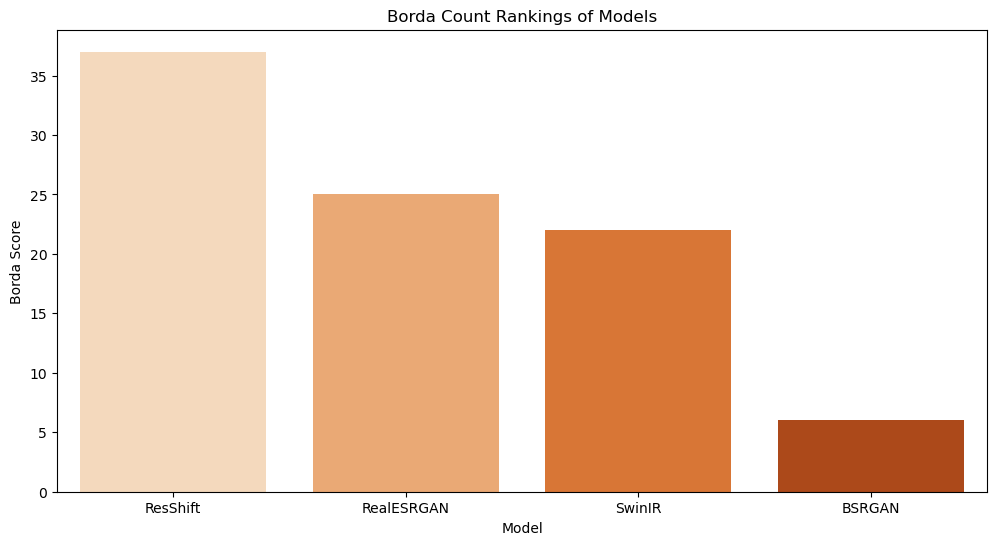

In [109]:
from collections import defaultdict

# Initialize Borda scores
borda_scores = defaultdict(int)

# Assign points based on rank (Borda Count)
# Each selection counts as a vote for the selected model
for session in data_df['SessionID'].unique():
    session_data = data_df[data_df['SessionID'] == session]
    selection_counts = session_data['SelectedModel'].value_counts()
    sorted_models = selection_counts.sort_values(ascending=False).index.tolist()
    num_models = len(models)
    for rank, model in enumerate(sorted_models, start=1):
        borda_scores[model] += num_models - rank  # Higher rank gets more points

# Convert to DataFrame
borda_df = pd.DataFrame.from_dict(borda_scores, orient='index', columns=['Borda_Score']).sort_values(by='Borda_Score', ascending=False)
print("Borda Count Rankings:")
display(borda_df)

# Visualize Borda Scores
plt.figure(figsize=(12,6))
sns.barplot(x=borda_df.index, y=borda_df['Borda_Score'], palette='Oranges')
plt.title('Borda Count Rankings of Models')
plt.xlabel('Model')
plt.ylabel('Borda Score')
plt.show()


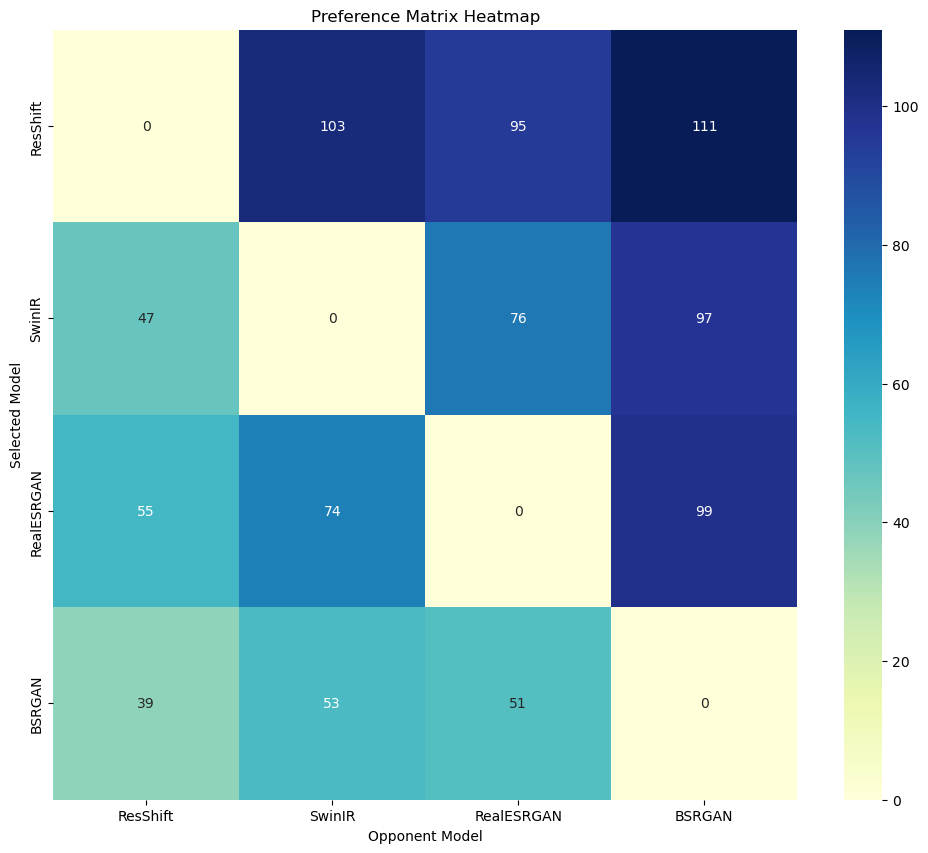

In [110]:
plt.figure(figsize=(12,10))
sns.heatmap(preference_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Preference Matrix Heatmap')
plt.xlabel('Opponent Model')
plt.ylabel('Selected Model')
plt.show()


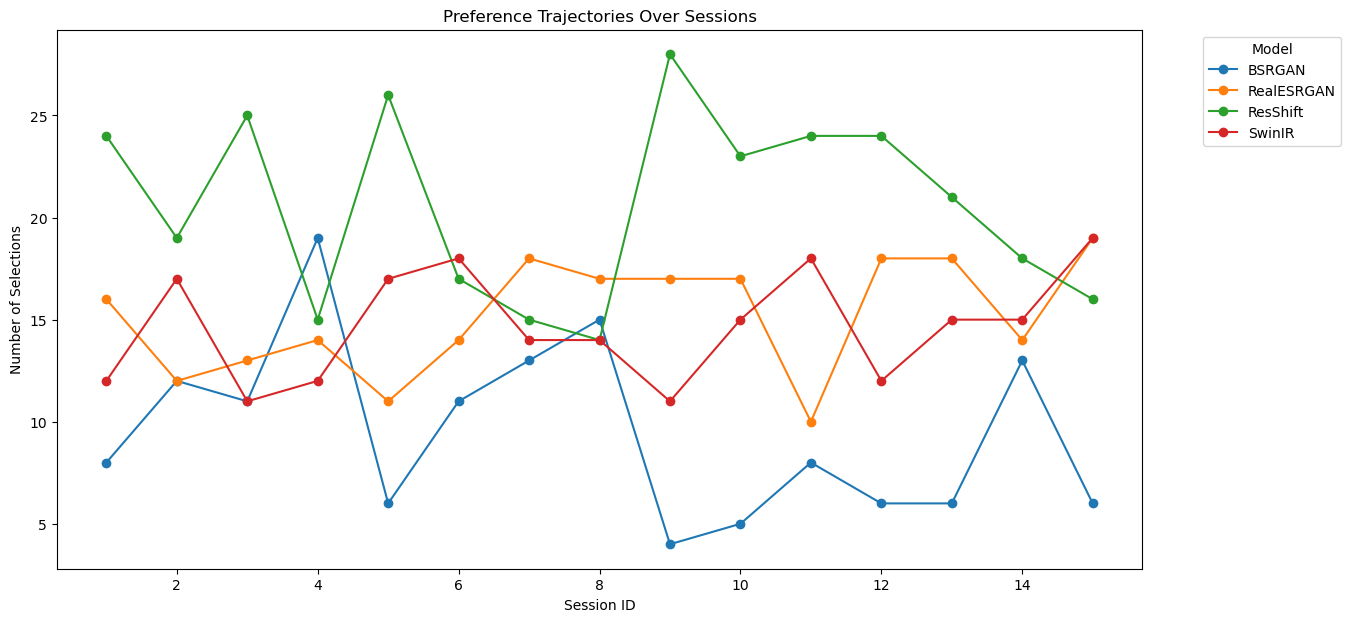

In [111]:
# Aggregate selections over sessions
selection_over_time = data_df.groupby(['SessionID', 'SelectedModel']).size().reset_index(name='Counts')

# Pivot for plotting
pivot_time = selection_over_time.pivot(index='SessionID', columns='SelectedModel', values='Counts').fillna(0)

# Sort sessions chronologically if applicable
pivot_time = pivot_time.sort_index()

# Plot
pivot_time.plot(kind='line', figsize=(14,7), marker='o')
plt.title('Preference Trajectories Over Sessions')
plt.xlabel('Session ID')
plt.ylabel('Number of Selections')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
